<a href="https://colab.research.google.com/github/BaileyMeche/RecSystem_MIT_ADSP/blob/main/Music_Recommendation_System_Full_Code_BaileyMeche_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

Bailey Meche

## **Executive Summary**

This project presents a solution design that leverages user-user similarity and collaborative filtering recommendation systems to enhance the music listening experience for users based on the Million Song Dataset. It recommends using two playlists, combining Model-Based Collaborative Filtering (Matrix Factorization) and User-User Similarity-Based Collaborative Filtering with a content-based similarity approach to provide highly accurate and diverse song recommendations. This approach uses the models that performed best among all considered models, including hybrid models that combine two techniques. While the proposed solution shows promise, it acknowledges the need for further research and consideration of additional models since these models' matrix for precision and accuracy is still objectively low.
More complex models could include a supervised machine learning approach, but it is worth noting that these models are very computationally efficient.


## **Problem Summary**

- Summary of the problem - Explain the reason for the proposed solution design - How it would affect the problem/business?

### Context:

* With the advent of technology, societies have become more efficient with their lives. At the same
time, however, individual human lives have also become more fast-paced and distracted, leaving
little time to explore artistic pursuits. Also, technology has made significant advancements in the
ability to coexist with art and general entertainment. It has in fact made it easier for humans with a
shortage of time to find and consume good content.

* Almost every internet-based company's revenue relies on the time consumers spend on its platform.
These companies need to be able to figure out what kind of content is needed in order to increase
customer time spent and make their experience better. Therefore, one of the key challenges for
these companies is figuring out what kind of content their customers are most likely to consume.

* Spotify is one such audio content provider with a huge market base across the world. With the
ever-increasing volume of songs becoming available on the Internet, searching for songs of interest
has become a tedious task in itself. However, Spotify has grown significantly in the market because
of its ability to recommend the ‘best’ next song to each and every customer based on a huge
preference database gathered over time - millions of customers and billions of songs. This is done
by using smart recommendation systems that can recommend songs based on users’ likes/dislikes.


### The objective:

 - We seek to build a recommendation system to propose two playlists of the top 10 songs for a user based on the likelihood of
listening to those songs.


### The key questions:

- What insights do the data provide?
- What are the different clustering methods that can be applied and what are their implicaitons and advantages?

- How will we compare and evaluate the different models we build on this data?
  * For performance evaluation of these models, the F-1 score and RMSE score is calculated for each working model and is used to compare across different trained models.

- What observations and insights can be drawn from the performance metrics of each built model so that we may choose the best model?

### The problem formulation:

* We seek to find the best models on this data using the given customer dataset leveraging unsupervised learning models. These models will not only be compared using performance metrics but also the inherent advantages and disadvantages that each offers.

### **Solution Design**
- Several recommendation system models were considered in search of the most efficient system. After extensive evaluation using performance metrics RMSE and F1 score, the final proposed solution is 2 playlists that combine the strengths of **Model-Based Collaborative Filtering** and  **User-User Similarity-Based Collaborative Filtering** then integrating Content-Based similarity recommendations. These two models were chosen based on their superior performance. This solution aims to provide highly personalized and diverse song recommendations to users, enhancing their music listening experience and engagement with the platform. By providing customized recommendations, playlists  "Hidden Gems" and "Listeners Like You" have proven their potential to improve user retention, user retention, and competitive advantage using a data-driven approach.

### **Recommendations for implementation**
We recommend implementing the proposed hybrid recommendation model that combines Model-Based Collaborative Filtering and User-User similarity-based Collaborative Filtering with concern to its estimated error. These models performed best among our considered models, but this approach may not be objectively optimal. This model should be integrated into the existing music streaming platform to provide users with more accurate and personalized song recommendations. Such an integration should not be costly since the personalized playlists "Hidden Gems" and "Listeners Like You" may be easily added to a user's platform.

The development and deployment of this recommendation model system should consider many factors. The deployment of the model should include separating recommendations by genre, recommending songs that were recently interacted with, and filtering the users’ data such that the model only trains on meaningful song play counts. The deployment of this approach should not be costly since both models fit efficiently to data and the hyperparameters of each model are already identified. The development of this approach should consider user feedback, user retention, and its community effect to continuously refine and optimize the model. We advise implementing a monitoring system to track user engagement metrics, such as time spent on the platform, song plays, and playlist interactions. The expected benefits include increased user engagement, higher user retention, and potentially more premium subscriptions or ad interactions. A better user experience can result in improved business performance.

A key challenge to this solution is ensuring that the hybrid model performs as expected and continues to adapt to changing user preferences is a challenge. Regular model evaluation and updates are necessary. It is important to note that handling user data responsibly and respecting privacy regulations is crucial and should not come second to optimal recommendations. Stakeholders must address data privacy and security concerns before implementing this solution. An additional challenge is ensuring this solution’s long-term success. This concerns the quality and diversity of the music catalog which plays a significant role in user satisfaction. Ensuring a wide variety of songs is available is essential. As the user base grows, the recommendation system should be scalable to handle increased user interactions and data.

Further analysis can be done to enhance the content-based similarity recommendations. As mentioned, this solution may be compared to supervised machine learning solutions. Leveraging natural language processing and audio analysis can improve the accuracy of song suggestions.


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

Avoiding GridSearchCV is recommended

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163345 sha256=51084d41c20978bf4e21648733cf3671c9f1ca26dc19efdac1e7bca74bcc1a61
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Import Matplotlib the Basic library for data visualization

import seaborn as sns                           # Import seaborn - Slightly advanced library for data visualization

from sklearn.metrics.pairwise import cosine_similarity # Import the required library to compute the cosine similarity between two vectors

from collections import defaultdict             # Import defaultdict from collections A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # Impoort mean_squared_error : a performance metrics in sklearn

### **Load the dataset**

In [ ]:
# Importing the datasets
song_df = pd.read_csv('song_data.csv')
count_df = pd.read_csv('count_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df[:10]

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df[:10]

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
* The `count_df` dataset hosts users and records how many plays were counted for each song. This dataset has 2,000,000 entries and has datatypes as expected: objects for users and songs, and integers for play counts.

* The `song_df` dataset has 1,000,000 entries each representing songs in the dataset. This set lists song_id, title, release album, artist name, and year of the release for each song. Each column's datatype is as expected: object for song id, titel, release, and artist name, and integer for release year.

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
song_df = count_df.merge(song_df, how='left', on='song_id').drop_duplicates(subset=[ 'user_id','song_id'])

# Drop the column 'Unnamed: 0'
## Name the obtained dataframe as "df"
df = song_df.drop(columns=['Unnamed: 0'])
df.shape

(2000000, 7)

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

* Labeling the users, songs by number will be much more convenient for our purposes than the encripted representation.

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder                # To do label encoding

# Label Encoding
le = LabelEncoder()

# Fit transform the user_id column
df['user_id'] = le.fit_transform(df['user_id'])

# Fit transform the business_id column
df['song_id'] = le.fit_transform(df['song_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

* Yes. Songs with very few plays are not important to make rules about recommendations to active users. Similarly, we should not make recommendation rules based on infrequently active users.

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [ ]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

After these transformations, we now have 117876 unique observations  in dataset `df_final`

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

In [ ]:
3155*563

1776265

#### **Observations and Insights:**

* There are 3155 unique users listening to 563 unique songs between 232 unique artists.

* If every user listened to every song at least once, we would have 1658389 observations. This is very large compared to our 117876 observations of a user listening to a song *x* many times, so we expect our user-item matrix to be sparse.

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
df_final.groupby('song_id')['play_count'].sum().sort_values(ascending=False)

song_id
352     1634
2220    1583
8582    1463
5531    1427
4448    1291
        ... 
122      158
1659     157
2501     157
6121     155
2342     146
Name: play_count, Length: 563, dtype: int64

In [ ]:
df_final['title'].loc[df_final['song_id'] ==352 ][:1]

929    Dog Days Are Over (Radio Edit)
Name: title, dtype: object

Most interacted users

In [ ]:
df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False)

user_id
3237     586
15733    479
62759    438
43041    417
27401    409
        ... 
33657      1
14439      1
34194      1
45476      1
76347      1
Name: play_count, Length: 3155, dtype: int64

#### **Observations and Insights:**#

* The most popular song is "Dog Days Are Over (Radio Edit)" which has `song_id` 352 and 1634 plays.
* The most interactive user is user 3257.


Songs played in a year

In [ ]:
# Find out the number of songs played in a year
  # Hint: Use groupby function on the 'year' column

#We may sort the number of play counts by release year since we don't know the year the song was played.
#From this sort, we take the year with the highest number of plays
df_final.groupby('year')['play_count'].sum().sort_values(ascending=False)[:5]

year
0       37358
2009    28328
2008    23173
2007    21750
2003    12787
Name: play_count, dtype: int64

In [ ]:
#To find the most popular songs in the year 2009
df_final.loc[df_final['year']==2009].groupby('song_id')['play_count'].sum().sort_values(ascending=False)[:5]

song_id
5531    1427
4448    1291
4639     999
7791     985
7103     907
Name: play_count, dtype: int64

In [ ]:
#To find the song titles, artists of songs with song_id 5531, 4448, and 4639
print(df_final[['title','artist_name']].loc[df_final['song_id']==5531][:1])
print(df_final[['title','artist_name']].loc[df_final['song_id']==4448][:1])
print(df_final[['title','artist_name']].loc[df_final['song_id']==4639][:1])

        title  artist_name
9151  Secrets  OneRepublic
         title         artist_name
980  Fireflies  Charttraxx Karaoke
            title artist_name
1291  Bulletproof     La Roux


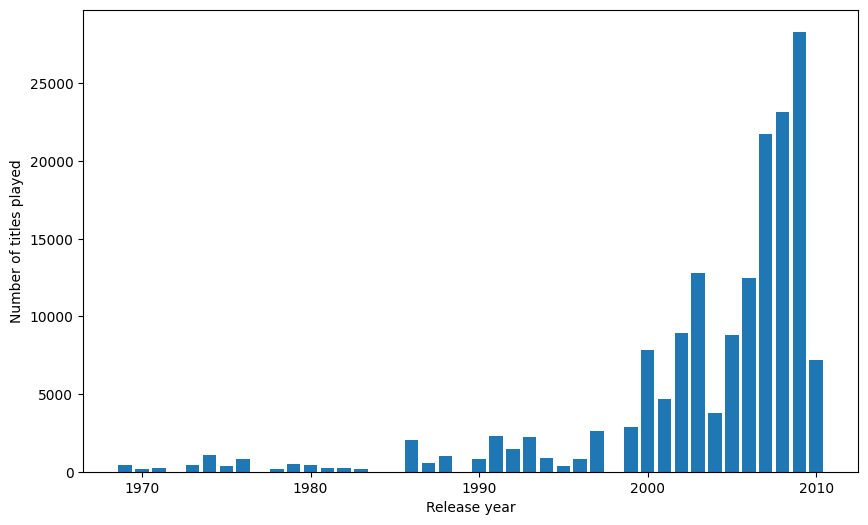

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
sorted_playcount_year = df_final.groupby('year')['play_count'].sum().sort_values(ascending=False)   #Create the object with the sorted years by play count
sorted_playcount_year = sorted_playcount_year.drop(0)                                         #Drop the songs without a year entry

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the x label of the plot
plt.xlabel('Release year')

# Set the y label of the plot
plt.ylabel('Number of titles played')

#Create the bar plot
plt.bar(sorted_playcount_year.index, sorted_playcount_year.values)

# Show the plot
plt.show()

#### **Observations and Insights:**
* The release year with the highest play counts is 2009 with 37358 play counts. This release year includes titles like
  * Secrets,  OneRepublic
  * Fireflies, Charttraxx Karaoke
  * Bulletproof, La Roux
* The counts of listens by release year increases exponentially staritng around 2000. The dataset includes data up to release dates in 2010, and play counts in 2010 drop significantly
* This dataset is heavily left skewed, biasing recent years.

In [ ]:
df_final['play_count'].describe()

count    117876.000000
mean          1.700058
std           1.089517
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: play_count, dtype: float64

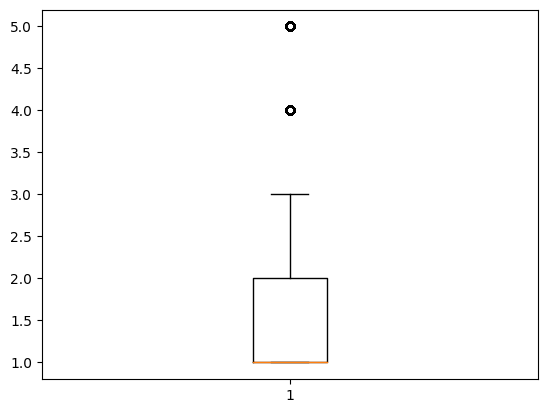

In [ ]:
plt.boxplot(df_final['play_count'])
plt.show()

**Think About It:** What other insights can be drawn using exploratory data analysis?

* We may also note from the boxplot above that the rating counts (after editing) are heavily right skewed, biasing lower play counts.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
song_avg_play = (df_final.groupby('song_id')).mean().drop(['year','user_id'], axis=1)

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
song_count_plays = df_final.groupby('song_id').size()

In [ ]:
# Making a dataframe with the average_count and play_freq
song_avg_play['play_freq'] = song_count_plays.values

  #Renaming original column name to play_count to average_count since we averaged the play counts using the grouby function
sorted_avg_play = (song_avg_play.sort_values('play_freq', ascending=False)).rename(columns={ 'play_count': 'average_count'})

# Let us see the first five records of the final_play dataset with respect to sum of play counts play_freq
sorted_avg_play[:5]

,average_count,play_freq
song_id,,
8582,1.948069,751
352,2.184492,748
2220,2.220196,713
1118,1.817221,662
4152,1.930982,652


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs_avg(data, n, min_interaction):                                   # Defining a function to get the top n products based on the highest average rating and minimum interactions

      # Calculate the average play count for each song
    song_avg_play = (df_final.groupby('song_id')).mean().rename(columns={'play_count':'average_count'})

      # Calculate the count of play counts for each song
    song_count_plays = df_final.groupby('song_id').size()

      # Create a dataframe with calculated average and count of ratings
    song_avg_play['play_freq'] = song_count_plays.values

      # Sort the dataframe by average of ratings in the descending order
    song_avg_play = song_avg_play.sort_values('average_count', ascending=False)

    # Finding products with minimum number of interactions
    recommendations = song_avg_play[song_avg_play['play_freq'] > min_interaction]

    # Sorting values with respect to average rating
    recommendations = recommendations.sort_values(by = 'average_count', ascending = False)

    return recommendations.index[:n]

In [ ]:
# Recommend top 10 songs using the function defined above
top_n_songs_avg(df_final,10,100)                            #Arbitrarily choosing min_interaction to be 100

Int64Index([7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352], dtype='int64', name='song_id')

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Import necessary libraries
# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

#### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

* We will use the RMSE score and the F1-score, whcih encapsulates precision and reacall, to compare different models.

In [ ]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    RMSE=accuracy.rmse(predictions)
    RMSE

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)

    # Formula to compute the F-1 score
    F_1 = round((2 * precision * recall) / (precision + recall), 3)
    print('F_1 score: ', F_1 )

    #Changed the performance function so that we may call values
    return RMSE, precision,recall,F_1

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

* A lower threshold results in higher precision and a higher threshhold results in higher recall. This is because the model predicts only most relevant items or all the relevant items for low and high threshholds, respectively.
* The intuition for a threshhold of 1.5 is this value balances precision and recall. This directly means the model will only recommend songs with 1.5 average play counts or higher. This is a good choice because the mean of `play_count` is 1.7.

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id',	'song_id',	'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

* A larger rest size will usually result in higher precision and recall since the model has more data to identify relevant items. This follows from the formula also since precision is the fraction of recommended items that are relevant in the top k predictions, and recall is the fraction of relevant items that are recommended to the user in top k predictions.

In [ ]:
# Build the default user-user-similarity model
sim_options = {'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
algo_knn_user = KNNBasic(sim_options=sim_options,verbose=False, random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
algo_knn_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(algo_knn_user)

RMSE: 1.0626
Precision:  0.413
Recall:  0.608
F_1 score:  0.492


(1.062594611048891, 0.413, 0.608, 0.492)

**Observations:**

- We can observe that the baseline model has `RMSE=1.06` on the test set.
- Intuition of Recall - We are getting a **recall of ~0.61**, which means out of **all the relevant products, 61% are recommended**.
- Intuition of Precision - We are getting a **precision of ~ 0.41**, which means **out of all the recommended products, 41% are relevant**.
- Here **F_1 score** of the **baseline model is ~0.49**. It indicates that **mostly recommended products were not relevant and relevant products were recommended more than half of the time**. This is not a good result. We can try to improve the performance by using **GridSearchCV to tune different hyperparameters** of the algorithm.

In [ ]:
# Predicting play_count for a sample user with a listened song
  # Use any user id  and song_id
  #Choose user 62759 from the users with highest interactions. Let's pick a song that they have interacted with
df_final.loc[df_final['user_id']==62759].head()

,user_id,song_id,play_count,title,release,artist_name,year
372293,62759,21,2,Back Against The Wall,Cage The Elephant,Cage The Elephant,2008
372295,62759,52,3,Halo,Halo,Beyoncé,2008
372296,62759,97,1,Harder Better Faster Stronger,Discovery,Daft Punk,2007
372297,62759,145,3,Fader,Fader,The Temper Trap,2009
372298,62759,154,1,Such Great Heights,Grey's Anatomy Original Soundtrack,The Postal Service,2003


In [ ]:
#Pick song 52 which has 3 plays
algo_knn_user.predict(62759, 52, r_ui=3, verbose=True)    # predict play_count for a sample user with a listened song

user: 62759      item: 52         r_ui = 3.00   est = 1.75   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=62759, iid=52, r_ui=3, est=1.7450701973448588, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
  #First, we find some songs that user 62759 has not interacted with by finding the difference between all songs and the songs user 62759 has interacted with
  #Define a function to find songs that have not been listened to by a given user
def n_songs_not_interacted_with_byUser(data, user_id,n):
    user_songs = df_final['song_id'].loc[df_final['user_id']==user_id]
    all_songs = df_final['song_id']
    return [element for element in all_songs if element not in user_songs][:n] # where n is the number of elements to get in the list

  #Similarly, we may define a function for later that returns users who have not listened to a given song
def n_users_not_interacted_with_song(data, song_id, n):
    users_by_song = df_final['user_id'].loc[df_final['song_id']==song_id]
    all_users = df_final['user_id']
    return [element for element in all_users if element not in users_by_song][:n] # where n is the number of elements to get in the list

#Now, we find 5 songs that user 62759 has not listened to
n_songs_not_interacted_with_byUser(df_final, 62759,5)

[447, 512, 549, 703, 719]

In [ ]:
#From 168 songs user 62759 has not interacted with, we choose song 549
#predict play_count for any sample user
algo_knn_user.predict(62759, 549,  verbose=True)

user: 62759      item: 549        r_ui = None   est = 1.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=62759, iid=549, r_ui=None, est=1.5483035949286232, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:**

* We observe that the actual play count for this user-song pair is 3 but the model prediction is 1.75 plays, which is not very accurate.
* Therefore, we cannot trust the play prediction for the song that the user has not interacted with.  

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0588990609623954
{'k': 40, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}


This updated model has an `rmse=1.06`, equal to the pretrained model.

Initial optimal parameters for RMSE score are
`'k': 40, 'min_k': 9, 'sim_options': {'name': 'msd', 'user_based': True}}`

Next, we test for a more optimal rmse score by expaning the parameter grid  

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30, 40,50,80,100], 'min_k': [3, 6, 9,11,13,15],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0542305890770312
{'k': 100, 'min_k': 15, 'sim_options': {'name': 'msd', 'user_based': True}}


Optimal parameters after this expanded search are given by `{'k': 100, 'min_k': 13, 'sim_options': {'name': 'msd', 'user_based': True}}`


In [ ]:
# Train the best model found in above gridsearch
sim_options = {'name': 'msd', 'user_based': True}
similarity_algo_optimized = KNNBasic(sim_options=sim_options, k=100, min_k=13, verbose=False)

# Training the algorithm on the trainset
similarity_algo_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =40 (optimal)
precision_recall_at_k(similarity_algo_optimized)

RMSE: 1.0572
Precision:  0.414
Recall:  0.673
F_1 score:  0.513


(1.057231579285199, 0.414, 0.673, 0.513)

**Observations and Insights:**
* After tuning hyperparameters, RMSE for the test set has not changed from 1.062. This indicates that the tuned model is not performing any better than the untrained model.
* We can observe that the F-1 score has not improved either.
* Hence, we expect that the predictions below will not be any more accurate than the nonoptimized model.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
similarity_algo_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.50   {'actual_k': 99, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4959965332702112, details={'actual_k': 99, 'was_impossible': False})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
  #Finding a song that has not been listened to by user 6958
n_songs_not_interacted_with_byUser(df_final, 6958,1)

[447]

In [ ]:
  #Predicting play count
similarity_algo_optimized.predict(6958, 447, verbose=True)

user: 6958       item: 447        r_ui = None   est = 1.23   {'actual_k': 93, 'was_impossible': False}


Prediction(uid=6958, iid=447, r_ui=None, est=1.2277349413420975, details={'actual_k': 93, 'was_impossible': False})

**Observations and Insights:**
* Here, the model predicted a play count of 1.52 for a song it has interacted with played 2 times. This is okay, but note also that the threshhold is 1.5.
- The predicted rating for user 6958 is 1.11 for song 447 is has not interacted with. This rating can not be trusted since this model is not performing well. Hence, this product should not be recommended to this user until we have a better model.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

* Yes, we can do this based on the msd distance metric to find this similarity.

In [ ]:
# Use inner id 0
similarity_algo_optimized.get_neighbors(0, k=5)

[31, 82, 90, 116, 125]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix: user by song
    user_item_interactions_matrix= df_final.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those business ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the business ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, similarity_algo_optimized)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
recommendations = pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])
recommendations

,song_id,predicted_ratings
0,7224,2.935235
1,6450,2.668720
2,8324,2.467205
3,6448,2.386082
4,4831,2.348859


**Observations and Insights:**
* The top 5 recommendations for user 6958 with a similarity-based recommendation are songs 7224, 6450, 8324, 6448, and 4831 before corrections.

#### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_rating):
  recommendations_list = list(recommendations['song_id'])
  # Sort the songs based on play counts
  ranked_songs = pd.DataFrame(final_rating[final_rating.index.isin(recommendations_list)].sort_values(ascending = False))

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_count'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  return ranked_songs

the idea is recommendations using small observations will be penalized larger than recommendations using large observations.

takes predicted rating and applies penalty


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

* The intuition behind this adjustment is this term largely penalizes recommendations with low observation counts to support it. Alternatively, recommendations made with many observaitons are not penalized by very much.

In [ ]:
#This final_play dataset sums the play counts of each song
final_play = df_final.groupby('song_id')['play_count'].sum()

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,play_count,predicted_ratings,corrected_ratings
0,7224,361,2.935235,2.882604
1,6450,263,2.668720,2.607057
2,8324,252,2.467205,2.404211
4,6448,202,2.386082,2.315723
3,4831,214,2.348859,2.280500


**Observations and Insights:**

* After making corrections, the top 5 recommendations for user 6958 with a similarity-based recommendation are still songs 7224, 6450, 8324, 6448, and 4831 in that order.
* This also indicates that the original recommendations were justified and reliable.
* Therefore, these 5 songs should be recommended to user 6958.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',    # Declaring the similarity options
               'user_based': False}

algo_knn_item = KNNBasic(sim_options=sim_options,verbose=False,random_state=1)  # KNN algorithm is used to find desired similar items. Use random_state=1

algo_knn_item.fit(trainset)                                                     # Train the algorithm on the trainset, and predict ratings for the test set

precision_recall_at_k(algo_knn_item)                                            # Let us compute precision@k, recall@k, and f_1 score with k = 10

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


(1.0393632434634457, 0.307, 0.562, 0.397)

**Observations and Insights:**

* We can observe that the baseline model has `RMSE=1.04` & `F_1 Score=0.397`on the test set.
* This is not a very good performance, so we expect the predictions below to be poor.
* We can try to improve the performance number by using `GridSearchCV` to tune different hyperparameters of this algorithm.

In [ ]:

# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
play_ct = df_final['play_count'].loc[(df['song_id']==1671) & (df['user_id']==6958)].tolist()[0]
algo_knn_item.predict(6958, 1671, r_ui=play_ct, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

  #We first find a user that has not interacted with song 1671, taking the first
user = n_users_not_interacted_with_song(df_final, 1671, 1)[0]

  #Then predict play count
algo_knn_item.predict(user, 1671,  verbose=True)

user: 6958       item: 1671       r_ui = None   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=None, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

*  The base item-item model has predicted a 1.36 play count for a song that has been listened to 2 times by this user. This is not positive since these are not very close.
* Hence, we cannot trust the rating of 1.36 for the item that the user has not interacted with.

In [ ]:
# Apply grid search for enhancing model performance
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10,20,30], 'min_k': [3,6,9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)

# Fitting the data
grid_obj.fit(data)

# Find the best RMSE score
print(grid_obj.best_score['rmse'])


# Find the combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

* A higher value for k, the nearest neighbor count, will generally result in more accurate predictions, but it can also lead to overfitting.
* The minimum number of neighbors in the algoritm is useful for preventing the model from making predictions based on too few neighbors.
* Using GridSearchCV, we have found that the optimal hyperparamters for rmse score are `{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}`
* To improve the performance of this model after optimization, we can change the hyperparameter grid. This is done below


In [ ]:
# Apply grid search for enhancing model performance
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [30,40, 50], 'min_k': [3,6,9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
grid_obj = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)

# Fitting the data
grid_obj.fit(data)

# Find the best RMSE score
print(grid_obj.best_score['rmse'])


# Find the combination of parameters that gave the best RMSE score
print(grid_obj.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matr

After adjusting the parameter grid, we find that the parameters that optimize rmse score are {'k': 30, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': False}}

In [ ]:
# Apply the best model found in the grid search
similarity_algo_optimized_item = KNNBasic(sim_options={'name': 'cosine', 'user_based': False},
                                  k=30, min_k=3,verbose=False)    # Creating an instance of KNNBasic with optimal hyperparameter values

similarity_algo_optimized_item.fit(trainset)                                    # Training the algorithm on the trainset

precision_recall_at_k(similarity_algo_optimized_item)                           # Let us compute precision@k and recall@k, f1_score and RMSE

RMSE: 1.0391
Precision:  0.315
Recall:  0.568
F_1 score:  0.405


(1.0390673393335332, 0.315, 0.568, 0.405)

**Observations and Insights:**

* After tuning hyperparameters, RMSE for the test set has not improved.
* We can observe that after tuning the hyperparameters, the tuned model's F-1 score increased from 0.397 to 0.405 in comparison to the baseline model. This indicates that the model has slighly improved in terms of precision and recall, but this performance is still poor.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
similarity_algo_optimized_item.predict(6958, 1671, r_ui=play_ct, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
similarity_algo_optimized_item.predict(6958, 3232,  verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.38   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.377602711737415, details={'actual_k': 20, 'was_impossible': False})

**Observations and Insights:**

* The base model predicted a play count of 1.36 when the play count was 2. This indicates that the tuned model has a slightly more accurate prediction, but it is still not accurate.
* It may also be observed that the predicted play count of 1.38 for the user who has not interacted with song 3232. This is still not reliable for reasons listed above.

### **Identifying similar items to a given item (nearest neighbors)**

In [ ]:
# Find five most similar items to the item with inner id 0
similarity_algo_optimized_item.get_neighbors(0, k=5)

[3, 10, 11, 24, 30]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, similarity_algo_optimized_item)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommendations = pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])
recommendations

,song_id,predicted_ratings
0,2842,1.650010
1,7921,1.542349
2,1767,1.540675
3,4631,1.539257
4,5417,1.538866


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,play_count,predicted_ratings,corrected_ratings
0,2842,396,1.650010,1.599759
1,7921,337,1.542349,1.487875
2,5417,208,1.538866,1.469528
3,4631,191,1.539257,1.466899
4,1767,161,1.540675,1.461864


**Observations and Insights:**

* The nearest recommended songs to the song with inner id 0 are songs 3, 10, 11, 24, 30.
* The top 5 recommended songs for user 6958 based on this item-item similarity-based collaborative filtering model are song 7224 with predicted rating	2.549267, song 5653 with predicted rating 2.045227, song 8324	with predicted rating 1.951097, song 6450 with predicted rating	1.890830, and 9942	with predicted rating 1.888337.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state=1)                                                       # Using SVD matrix factorization using random_state = 1

svd.fit(trainset)                                                               # Training the algorithm on the trainset

precision_recall_at_k(svd)                                                      # Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


(1.0252486830347507, 0.41, 0.633, 0.498)

In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
user = n_users_not_interacted_with_song(df_final, 3232, 1)[0]
svd.predict(user, 3232,  verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.0122715271232146
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

* The number of epochs controls how many times the algorithm will iterate over the training data. Increasing this hyperparamter can marginally improve the accuracy of the model, but it is also more expensive to train.
* The learning rate controls how quickly the algorithm learns. A higher learning rate can lead to faster training, but using a higher rate leads to overfitting on the training data.
* The regularization parameter controls how much the algorithm penalizes large weights to prevent overfitting. Increasing this hyperparamter can reduce the accuracy of the model.
* By providing reasonable options for each of these hyperparamters for GridSearchCV to each on, we can rely on the fact that `{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}` is optimal for `rmse` score which is the performance metric that we chose to compare models.
* We may be able to improve the performance by changing this hyperparamter grid, but it is unlikely that options outside of these paramters would provide any marginal benefit.

Here is an additional search for better hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [20, 30, 40, 100, 200,400,500], 'lr_all': [0.001, 0.005, 0.01, 0.05, 0.1],
              'reg_all': [0.05, 0.1, 0.2, 0.4]}

# Performe 3-fold grid-search cross-validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

After changing the paramter grid to search for optimal values, we have found that the optimal hyperparamters are `{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}` which has a different 'reg_all' value than the original GridSearchCV

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.1, random_state=1)

svd_optimized=svd_optimized.fit(trainset)                             # Train the algorithm on the trainset

precision_recall_at_k(svd_optimized)                                       # Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE

RMSE: 1.0082
Precision:  0.419
Recall:  0.619
F_1 score:  0.5


(1.0082228878707886, 0.419, 0.619, 0.5)

`{'n_epochs': 200, 'lr_all': 0.005, 'reg_all': 0.2}` does worse on F-1 score

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs=200, lr_all=0.005, reg_all=0.2, random_state=1)

svd_optimized=svd_optimized.fit(trainset)                             # Train the algorithm on the trainset

precision_recall_at_k(svd_optimized)

RMSE: 1.0044
Precision:  0.413
Recall:  0.628
F_1 score:  0.498


(1.004415229732672, 0.413, 0.628, 0.498)

**Observations and Insights:**

* After tuning hyperparameters, RMSE for the test set has reduced from 1.0398 to 1.008. This indicates that the model has improved after optimizing the hyperparamters.
- We can observe that after tuning the hyperparameters, the tuned matrix factorization model's F-1 score increased slightly from 0.498 to 0.5 in comparison to the baseline model.
* The matrix factorization model is currently our **best model** in terms of F-1 score.

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui=play_ct, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.46   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.463408095421835, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_optimized.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.44545436704755, details={'was_impossible': False})

**Observations and Insights:**
*  The optimized matrix factorization model has predicted a 1.34 play count for an song that has been played 2 times by this user. This is no better than the previous model.
- This optimized model largely does not provide accurate predictions.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)         # Make top 5 recommendations for any user_id with a similarity-based recommendation engine

In [ ]:
recommendations = pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])
recommendations

,song_id,predicted_ratings
0,7224,2.355261
1,5653,2.057882
2,5531,2.039007
3,9942,2.004696
4,6860,1.969583


In [ ]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, final_play)

,song_id,play_count,predicted_ratings,corrected_ratings
3,7224,361,2.355261,2.302629
0,5531,1427,2.039007,2.012535
4,5653,248,2.057882,1.994382
1,9942,373,2.004696,1.952918
2,6860,367,1.969583,1.917383


**Observations and Insights:**

* The top 5 recommended songs for user 6958 based on this item-item similarity-based collaborative filtering model are song 7224 with predicted rating	2.549267, song 5653 with predicted rating 2.045227, song 8324	with predicted rating 1.951097, song 6450 with predicted rating	1.890830, and 9942	with predicted rating 1.888337.
* This peformance is the same as the previous item-item model.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)       # Using CoClustering algorithm
clust_baseline.fit(trainset)                          # Training the algorithm on the train set
precision_recall_at_k(clust_baseline)                 # Let us compute precision@k, recall@k, and F_1 score with k = 10

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


(1.0486672859827517, 0.397, 0.582, 0.472)

In [ ]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = play_ct, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

- **n_cltr_u** (int) – Number of **user clusters**. The default value is 3.
- **n_cltr_i** (int) – Number of **item clusters**. The default value is 3.
- **n_epochs** (int) – Number of **iteration of the optimization loop**. The default value is 3.
- **random_state** (int, RandomState instance from NumPy, or None) – Determines the RNG that will be used for initialization. If int, random_state will be used as a seed for a new RNG. This is useful to get the same initialization over multiple calls to fit(). If RandomState instance, this same instance is used as RNG. If None, the current RNG from NumPy is used. The default value is None.
- **verbose** (bool) – If True, the current epoch will be printed. The default value is False.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [3, 4, 5, 6], 'n_cltr_i': [3, 4, 5, 6], 'n_epochs': [30, 40, 50]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

* The optimized hyperparameters for rmse are `{'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 30}`
* The number of clusters can lead to a more accurate model for more clusters, but it is also more expensive to to train.
* A higher number of clusters can lead to a more accurate model, but it can also take longer to train.
*  Increasing the number of epochs can improve the accuracy of the model, but it can also take longer to train. It is unlikely to improve the performance in this case.
* We could change the hyperparamter grid to search for an optimal hyperparamter value not searched for to improve the performance further.

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [1,2,3, 4,5], 'n_cltr_i': [1,2,3, 4,5], 'n_epochs': [10,20,30, 40,100,200,500]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

After adjusting the paramter grid, we have found that the hyperparameters `{'n_cltr_u': 1, 'n_cltr_i': 1, 'n_epochs': 10}` optimizes rmse




In [ ]:
# Train the tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u = 1, n_cltr_i = 1, n_epochs = 10, random_state = 1)   # Using tuned Coclustering algorithm
clust_tuned.fit(trainset)                                                                 # Training the algorithm on the train set
precision_recall_at_k(clust_tuned)                                                        # Let us compute precision@k, recall@k, and F_1 score with k = 10

RMSE: 1.0315
Precision:  0.395
Recall:  0.587
F_1 score:  0.472


(1.0314911983758666, 0.395, 0.587, 0.472)

**Observations and Insights:**

- After tuning hyperparameters, RMSE for the test set has reduced from 1.0453 to 1.0299. This indicates some improvement.
- We can observe that after tuning the hyperparameters, the tuned matrix factorization model's F-1 score has not changed from the base model.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_tuned.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.13   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.1257867112267959, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
clust_tuned.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.31   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3101301455702306, details={'was_impossible': False})

**Observations and Insights:**

* The optimized cluster based model has predicted a 1.29 play count for an item that has been listened to 2 times by this user. This prediction is moderately accurate.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

In [ ]:
recommendations = pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])
recommendations

,song_id,predicted_ratings
0,7224,2.926402
1,6450,2.166664
2,8324,2.143103
3,5653,2.118781
4,9942,2.046644


#### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, final_play)

,song_id,play_count,predicted_ratings,corrected_ratings
1,7224,361,2.926402,2.873770
2,6450,263,2.166664,2.105002
3,8324,252,2.143103,2.080109
4,5653,248,2.118781,2.055281
0,9942,373,2.046644,1.994866


**Observations and Insights:**

* The top 5 recommended songs for user 6958 based on this clustering based collaborative filtering model are song	7224 with predicted rating 3.042166, song	8324	with predicted rating	2.248504, song	9942	with predicted rating	2.163261, song	5531	with predicted rating	2.098091, and song	4831	with predicted rating	2.055424.
* This model is providing higher predicted play counts than the previous filtering models.

### **Hybrid model**

**Here are our options for a combined model:** any combinations of two models below


* User-User similarity based collaborative filtering model
  * RMSE: 1.0572
  * F_1 score:  0.513
* Item-Item similarity based collaborative filtering model
  * RMSE: 1.0391
  * F_1 score:  0.405

* Matrix factorization: Model based collaborative filtering model
  * RMSE: 1.0082
  * F_1 score:  0.5

* Cluster based collaborative filtering model
  * RMSE: 1.0315
  * F_1 score:  0.472

We now consider the combination of
####  **Matrix factorization model** and **cluster model**

These objects are given by `svd_optimized` and `clust_tuned`

In [ ]:
from surprise import AlgoBase, Dataset, Reader
from collections import defaultdict
from surprise import accuracy

# Define a custom hybrid model
class HybridModel(AlgoBase):
    def __init__(self, clust_tuned, svd_optimized, weight_clust_tuned=None, weight_svd_optimized=None):
        self.clust_tuned = clust_tuned
        self.svd_optimized = svd_optimized
        self.weight_clust_tuned = weight_clust_tuned
        self.weight_svd_optimized = weight_svd_optimized

    def fit(self, trainset):
        # Save the trainset, although it's not used in this custom model
        self.trainset = trainset

    def estimate(self, u, i):
        # Make predictions using both models
        prediction_clust_tuned = self.clust_tuned.estimate(u, i)
        prediction_svd_optimized = self.svd_optimized.estimate(u, i)

        # Combine predictions with the specified weights
        combined_score = (self.weight_clust_tuned * prediction_clust_tuned) + (self.weight_svd_optimized * prediction_svd_optimized)

        return combined_score

# Create an instance of the HybridModel
hybrid_model = HybridModel(clust_tuned, svd_optimized, weight_clust_tuned=0.5/(0.50+0.472), weight_svd_optimized=0.472/(0.50+0.472))

# Fit the hybrid model (you may or may not fit it, as it doesn't use the trainset)
hybrid_model.fit(trainset)

# Evaluate the hybrid model using your evaluation function
precision_recall_at_k(hybrid_model, k=30, threshold=1.5)

RMSE: 1.0135
Precision:  0.405
Recall:  0.608
F_1 score:  0.486


(1.0134824373107854, 0.405, 0.608, 0.486)

Since RMSE of the hybrid model is 1.014 is not greater than the RMSE of the matrix factorization model alone (1.01), the combination of these two models was not better than matrix factorization model.

In [ ]:
hybrid_model.predict(6958, 1671, r_ui=2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.289734543881177, details={'was_impossible': False})

**Optimizing this hybrid model**

In [ ]:
from scipy.optimize import minimize
from surprise import Prediction

# Define a function that calculates the RMSE for the hybrid model with given weights
def hybrid_rmse(weights, clust_tuned, svd_optimized, trainset, testset):
    weight_clust_tuned, weight_svd_optimized = weights
    hybrid_model = HybridModel(clust_tuned, svd_optimized, weight_clust_tuned, weight_svd_optimized)
    hybrid_model.fit(trainset)

    # Make predictions on the testset
    predictions = []
    for uid, iid, true_r in testset:
        est = hybrid_model.estimate(uid, iid)
        prediction = Prediction(uid, iid, true_r, est, details={})
        predictions.append(prediction)

    # Calculate RMSE
    rmse = accuracy.rmse(predictions)
    return rmse

# Initial guess for weights
initial_weights = [0.5, 0.5]  # Starting with equal weights

# Bounds for weights (0 to 1)
bounds = [(0, 1), (0, 1)]

# Minimize RMSE by adjusting the weights
result = minimize(hybrid_rmse, initial_weights, args=(clust_tuned, svd_optimized, trainset, testset), bounds=bounds)

# Extract the optimal weights
optimal_weights = result.x

# Create the final hybrid model with the optimal weights
final_hybrid_model = HybridModel(clust_tuned, svd_optimized, optimal_weights[0], optimal_weights[1])
final_hybrid_model.fit(trainset)

# Evaluate the final hybrid model using your evaluation function
print(optimal_weights)
precision_recall_at_k(final_hybrid_model, k=30, threshold=1.5)

RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0906
RMSE: 1.0905
RMSE: 1.0905
RMSE: 1.0905
RMSE: 1.0905
RMSE: 1.0905
RMSE: 1.0905
RMSE: 1.0904
RMSE: 1.0904
RMSE: 1.0904
RMSE: 1.0901
RMSE: 1.0901
RMSE: 1.0901
[0.84688262 0.15459535]
RMSE: 1.0249
Precision:  0.397
Recall:  0.595
F_1 score:  0.476


(1.02489923327215, 0.397, 0.595, 0.476)

In [ ]:
# Create an instance of the HybridModel
hybrid_model = HybridModel(clust_tuned, svd_optimized, weight_clust_tuned=optimal_weights[0], weight_svd_optimized=optimal_weights[1])

# Fit the hybrid model (you may or may not fit it, as it doesn't use the trainset)
hybrid_model.fit(trainset)

hybrid_model.predict(6958, 1671, r_ui=2)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.1796452773681805, details={'was_impossible': False})

Next we create a hybrid model between
#### **User-User** and **Item-Item** similarity-based collaborative filtering models

These objects are given by `similarity_algo_optimized` and `similarity_algo_optimized_item`

In [ ]:
class HybridModelKNN(AlgoBase):
    def __init__(self, knn_model1, knn_model2, weight_knn_model1=None, weight_knn_model2=None):
        self.knn_model1 = knn_model1
        self.knn_model2 = knn_model2
        self.weight_knn_model1 = weight_knn_model1
        self.weight_knn_model2 = weight_knn_model2

    def fit(self, trainset):
        # Save the trainset, although it's not used in this custom model
        self.trainset = trainset

    def estimate(self, u, i):
        # Make predictions using both KNN models
        est1, _ = self.knn_model1.estimate(u, i)
        est2, _ = self.knn_model2.estimate(u, i)

        # Combine predictions with the specified weights
        combined_score = (self.weight_knn_model1 * est1) + (self.weight_knn_model2 * est2)

        return combined_score

In [ ]:
# Create an instance of the HybridModel
hybrid_model = HybridModelKNN(similarity_algo_optimized, similarity_algo_optimized_item,
                              weight_knn_model1=0.6, weight_knn_model2=0.4)

# Fit the hybrid model (you may or may not fit it, as it doesn't use the trainset)
hybrid_model.fit(trainset)

# Evaluate the hybrid model using your evaluation function
k = precision_recall_at_k(hybrid_model, k=30, threshold=1.5)

RMSE: 1.0257
Precision:  0.415
Recall:  0.676
F_1 score:  0.514


In [ ]:
precision_recall_at_k(hybrid_model, k=30, threshold=1.5)[0]

RMSE: 1.0257
Precision:  0.415
Recall:  0.676
F_1 score:  0.514


1.0256571739879243


### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final[['title', 'release', 'artist_name']].apply(lambda x: ' '.join(x), axis=1)

In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_final[['user_id', 'song_id', 'play_count','title','text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset=['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small[:5]

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [ ]:
# Create the series of indices from the data
index_df_small = pd.Index(df_small)

In [ ]:
# Importing necessary packages to work with text data
import nltk
nltk.download('omw-1.4')

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs= cosine_similarity(song_tfidf, song_tfidf)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []
    indices = pd.Series(df_small.index)

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print('Indexes:',top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
       # recommended_songs.append(list(df_final.index)[i])
       recommended_songs.append([df_final['title'].iloc[list(df_final.index)[i]],
                                 df_final['artist_name'].iloc[list(df_final.index)[i]]])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

Indexes: [509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


[['Cosmic Love', 'Florence + The Machine'],
 ['Tighten Up', 'The Black Keys'],
 ["We Don't Stop (Explicit)", 'Young Bleed'],
 ['Bulletproof', 'La Roux'],
 ['Heart Shaped Box', 'Nirvana'],
 ['Lasso', 'Phoenix'],
 ['Closer', 'Nine Inch Nails'],
 ['Knocked Up', 'Kings Of Leon'],
 ['Kiss With A Fist', 'Florence + The Machine'],
 ['The Scientist', 'Coldplay']]

**Observations and Insights:**

* Above are the top 10 songs similar to Learn to Fly. These songs would be recommended for a user who has a high play count for this song. Songs by 'Florence + The Machine' are recommended as a result of listening to this song.

## Final Model

This recommendation system proposes the top 20 songs for user 6958 based on the following models
* We utilize **Model-based Collaborative Filtering** to make 5 song recommendations to the playlist *"Hidden Gems"*
  * After making 5 song recommendations from this central model, we make 5 more recommendations based on similarity to these songs using **Content-based similarity**. These recommendations will be based on the initial 5 songs recommended.

* Next, we utilize **User-User Similarity-Based Collaborative Filtering** to make 5 song recommendations to the playlist *"Listeners Like You"*
  * After making 5 song recommendations from this central model, we make 5 more recommendations based on similarity to these songs using **Content-based similarity**. These recommendations will be based on the initial 5 songs recommended.

#### **Hidden Gems**: Model-based Collaborative Filtering - Matrix factorization

In [ ]:
# Final model: Model-based Collaborative Filtering - Matirx
recommendations_model = get_recommendations(df_final, 6958, 5, svd_optimized)         # Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations_model = pd.DataFrame(recommendations_model, columns=['song_id', 'predicted_ratings']) #Put these recommendations into a dataframe

#Get predicted dataframe
predicted_song_plays = ranking_songs(recommendations_model, final_play)

#Getting the list of songs from this playlist
hidden_gems_pt1 = predicted_song_plays['song_id']
predicted_song_plays

,song_id,play_count,predicted_ratings,corrected_ratings
3,7224,361,2.355261,2.302629
0,5531,1427,2.039007,2.012535
4,5653,248,2.057882,1.994382
1,9942,373,2.004696,1.952918
2,6860,367,1.969583,1.917383


**Content-based recommendations** based on the first 5 recommendations from Model based filtering in `hidden_gems_pt1`

In [ ]:
song_recommendations = []

for song_id in hidden_gems_pt1:
  song_i = str(df_final['title'].loc[df_final['song_id']==song_id].values[0])                  #Find the name of recommended song:

  song_recommendations.append([song_i,
          df_final['artist_name'].loc[df_final['song_id']==song_id].values[0],
          'Matrix factorization'])                                               #Append song name and artist of recommended song to list

  content_similar_songs = recommendations(song_i, similar_songs)[0]
  content_similar_songs.append('Content-based similarity')                              #Appending the source of the recommendation
  song_recommendations.append(content_similar_songs)                                                 #Append song name of similar song to list

Indexes: [6, 461, 281, 512, 505, 111, 227, 114, 557, 395]
Indexes: [220, 0, 370, 371, 372, 373, 374, 375, 376, 368]
Indexes: [346, 29, 136, 177, 373, 374, 375, 376, 377, 378]
Indexes: [508, 552, 381, 380, 379, 378, 377, 376, 382, 375]
Indexes: [368, 370, 371, 372, 373, 374, 375, 376, 0, 377]


Finally, here is the **Hidden Gems** playlist:

Listed below are the recommended songs, artists, and the source of each recommendation.

In [ ]:
hidden_gems = pd.DataFrame(song_recommendations, columns = ['Song name', 'Artist name', 'Source of recommendation'])
hidden_gems

,Song name,Artist name,Source of recommendation
0,Victoria (LP Version),Old 97's,Matrix factorization
1,A-Punk (Album),Vampire Weekend,Content-based similarity
2,Secrets,OneRepublic,Matrix factorization
3,You've Got The Love,Florence + The Machine,Content-based similarity
4,Transparency,White Denim,Matrix factorization
5,Secrets,OneRepublic,Content-based similarity
6,Greece 2000,Three Drives,Matrix factorization
7,Half Of My Heart,John Mayer,Content-based similarity
8,Mercy:The Laundromat,Pavement,Matrix factorization
9,All I Do Is Win (feat. T-Pain_ Ludacris_ Snoop...,DJ Khaled,Content-based similarity


#### **Listeners Like You**: User-User Similarity-Based Collaborative Filtering

In [ ]:
# Final model 2: User-User Similarity-Based Collaborative Filtering
recommendations_model = get_recommendations(df_final, 6958, 5, similarity_algo_optimized)         # Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations_model = pd.DataFrame(recommendations_model, columns=['song_id', 'predicted_ratings']) #Put these recommendations into a dataframe

#Get predicted dataframe
predicted_song_plays = ranking_songs(recommendations_model, final_play)

#Getting the list of songs from this playlist
hidden_gems_pt2 = predicted_song_plays['song_id']
predicted_song_plays

,song_id,play_count,predicted_ratings,corrected_ratings
0,7224,361,2.935235,2.882604
1,6450,263,2.668720,2.607057
2,8324,252,2.467205,2.404211
4,6448,202,2.386082,2.315723
3,4831,214,2.348859,2.280500


**Content-based recommendations** based on the first 5 recommendations from Model based filtering in `hidden_gems_pt2`

In [ ]:
song_recommendations = []

for song_id in hidden_gems_pt2:
  song_i = str(df_final['title'].loc[df_final['song_id']==song_id].values[0])                  #Find the name of recommended song:

  song_recommendations.append([song_i,
          df_final['artist_name'].loc[df_final['song_id']==song_id].values[0],
          'User-User Similarity'])                                               #Append song name and artist of recommended song to list

  content_similar_songs = recommendations(song_i, similar_songs)[0]
  content_similar_songs.append('Content-based similarity')                              #Appending the source of the recommendation
  song_recommendations.append(content_similar_songs)

Indexes: [6, 461, 281, 512, 505, 111, 227, 114, 557, 395]
Indexes: [271, 308, 79, 479, 228, 357, 358, 383, 382, 381]
Indexes: [278, 68, 513, 217, 245, 213, 265, 404, 460, 378]
Indexes: [206, 140, 200, 164, 193, 133, 195, 197, 241, 243]
Indexes: [35, 534, 507, 557, 527, 523, 281, 525, 447, 486]


Finally, the **Listeners Like You** playlist is below:

In [ ]:
listeners_like_you = pd.DataFrame(song_recommendations, columns = ['Song name', 'Artist name', 'Source of recommendation'])
listeners_like_you

,Song name,Artist name,Source of recommendation
0,Victoria (LP Version),Old 97's,User-User Similarity
1,A-Punk (Album),Vampire Weekend,Content-based similarity
2,Brave The Elements,Colossal,User-User Similarity
3,I Kissed A Girl,Katy Perry,Content-based similarity
4,The Big Gundown,The Prodigy,User-User Similarity
5,Harder Better Faster Stronger,Daft Punk,Content-based similarity
6,Wild World,Cat Stevens,User-User Similarity
7,Mockingbird,Eminem,Content-based similarity
8,Heaven Must Be Missing An Angel,Tavares,User-User Similarity
9,I Gotta Feeling,Black Eyed Peas,Content-based similarity


## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:


* **For performance evaluation** of these models, the RMSE score is calculated for each working model and is used to compare across different trained models.
* The **Model-based Collaborative Filtering model** performs best in terms of RMSE score at 1.008 among all other model types considered
  * This is because the model-based filtering model is a **personalized recommendation system** that leverages **latent features** to find recommendations for each user.
  * Hence, this model is used to generate the playlist **Hidden Gems**
  * 5 songs from this model are generated from this model for the playlist, then 5 more songs are generated based on content-based similarity to these first 5 songs.
* The **User-User similarity-based collaborative filtering** performed the best out of all models considered in terms of F_1 score at 0.513.
  * This model is based on the **behavior and preferences of similar users** to the interested user, then recommends based on this similarity.
  * Hence, this model is used to generate the playlist **Listeners Like You**.
  * 5 songs from this model are generated from this model for the playlist, then 5 more songs are generated based on content-based similarity to these first 5 songs.
* Other models did not perform as well in terms of RMSE and R_1 score, including cluster-based, popularity, k-nearest neighbors, and discussed hybrid models.

**2. Refined insights**:
* We begin using this data by filtering for useful users and songs. The first step was to combine users. Then, we filter for users that have play counts more than 90, songs with more than 120 play counts, and remove songs that have more than 5 play counts.  
* From our data containing users with their play counts for each song, if every user listened to every song at least once, we would have 1658389 observations. This is very large compared to our 117876 observations of a user listening to a song x many times, so we expect our user-item matrix to be sparse.
* The play counts by release year is heavily left skewed, indicating that music from the 2000's are played the most.
* The distribution of play counts by user is heavily right skewed with a mean of 1.7. This helps us set our threshhold to 1.5.

**3. Proposal for the final solution design:**

* We propose adopting the Model-based Collaborative Filtering and User-User based similarity models since they performs the best in terms of the chosen metrics.
* The Model-based Collaborative Filtering model has many advantages, including:
  * ability to overcome the cold start problem since it can make predictions for users and items that have no existing ratings
  * ease of scalability since this model learns based on user-item matrix instead of the entire user-item matrix, and
  * high accuracy for large datasets.
* The User-User similarity model has many advantages, including:
  * identifying users who are similar in their tastes and preferences, making them useful for discovering items that similar users have liked
  * refining the recommendations by leveraging both individual preferences and the preferences of similar users
  * overcoming the cold-start problem by suggesting items based on similarities with other users, even when there's insufficient data for the new user

* We have also demonstrated the usefulness of identifying content-based similar items to recommend given an item. These similarity recommendation systems can be used in conjunction with the main Model-based Collaborative Filtering model by recommending:
  * similar items by content of (1) the previously played songs, and (2) the top recommended items from the main model.
  * This approach improves the overall model's diverse recommendations and enhances cross-genre appeal.